In [21]:
from env import get_connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import acquire
import prepare
import functions as f
import seaborn as sns

from scipy.stats import pearsonr, spearmanr

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import sklearn.preprocessing 

# Acquire

In [22]:
# Here I used my wrangle function to acquire, prepare, and split my data
df= acquire.get_zillow()

# Prepare
  - Here we will use our prepare function to clean/prep our data
  - This includes:
     - making sure we get rid of our null values
     - rename column names for easier use
     - make dummies 
     - drop columns of no use
  

In [23]:
df.head()

,Unnamed: 0,yearbuilt,taxvaluedollarcnt,taxamount,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips
0,0,NaN,27516.0,NaN,0.0,0.0,NaN,6037.0
1,1,NaN,10.0,NaN,0.0,0.0,NaN,6037.0
2,2,NaN,10.0,NaN,0.0,0.0,NaN,6037.0
3,3,NaN,2108.0,174.21,0.0,0.0,NaN,6037.0
4,4,2005.0,296425.0,6941.39,4.0,2.0,3633.0,6037.0


In [24]:
df.isna().sum()

Unnamed: 0                         0
yearbuilt                       9337
taxvaluedollarcnt                493
taxamount                       4442
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
fips                               0
dtype: int64

In [25]:
df.drop(columns= ['Unnamed: 0'], inplace= True)

In [26]:
train, val, test= prepare.prep_zillow(df) 

(1192919, 7)
(511252, 7)
(426043, 7)


In [27]:
train.isna().sum()

year_built        0
property_value    0
tax_amount        0
bedrooms          0
bathrooms         0
sqr_feet          0
fips              0
dtype: int64

# Explore 

In [28]:
train.head()

,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet,fips
553191,1923.0,373090.0,4579.25,4.0,2.0,1556.0,6037.0
1209132,1937.0,74070.0,986.55,3.0,2.0,1513.0,6037.0
174634,1954.0,138000.0,2553.05,4.0,2.0,2040.0,6037.0
170584,1959.0,263870.0,3139.76,3.0,2.0,1834.0,6059.0
2001226,1975.0,335603.0,3461.38,2.0,2.0,1225.0,6059.0


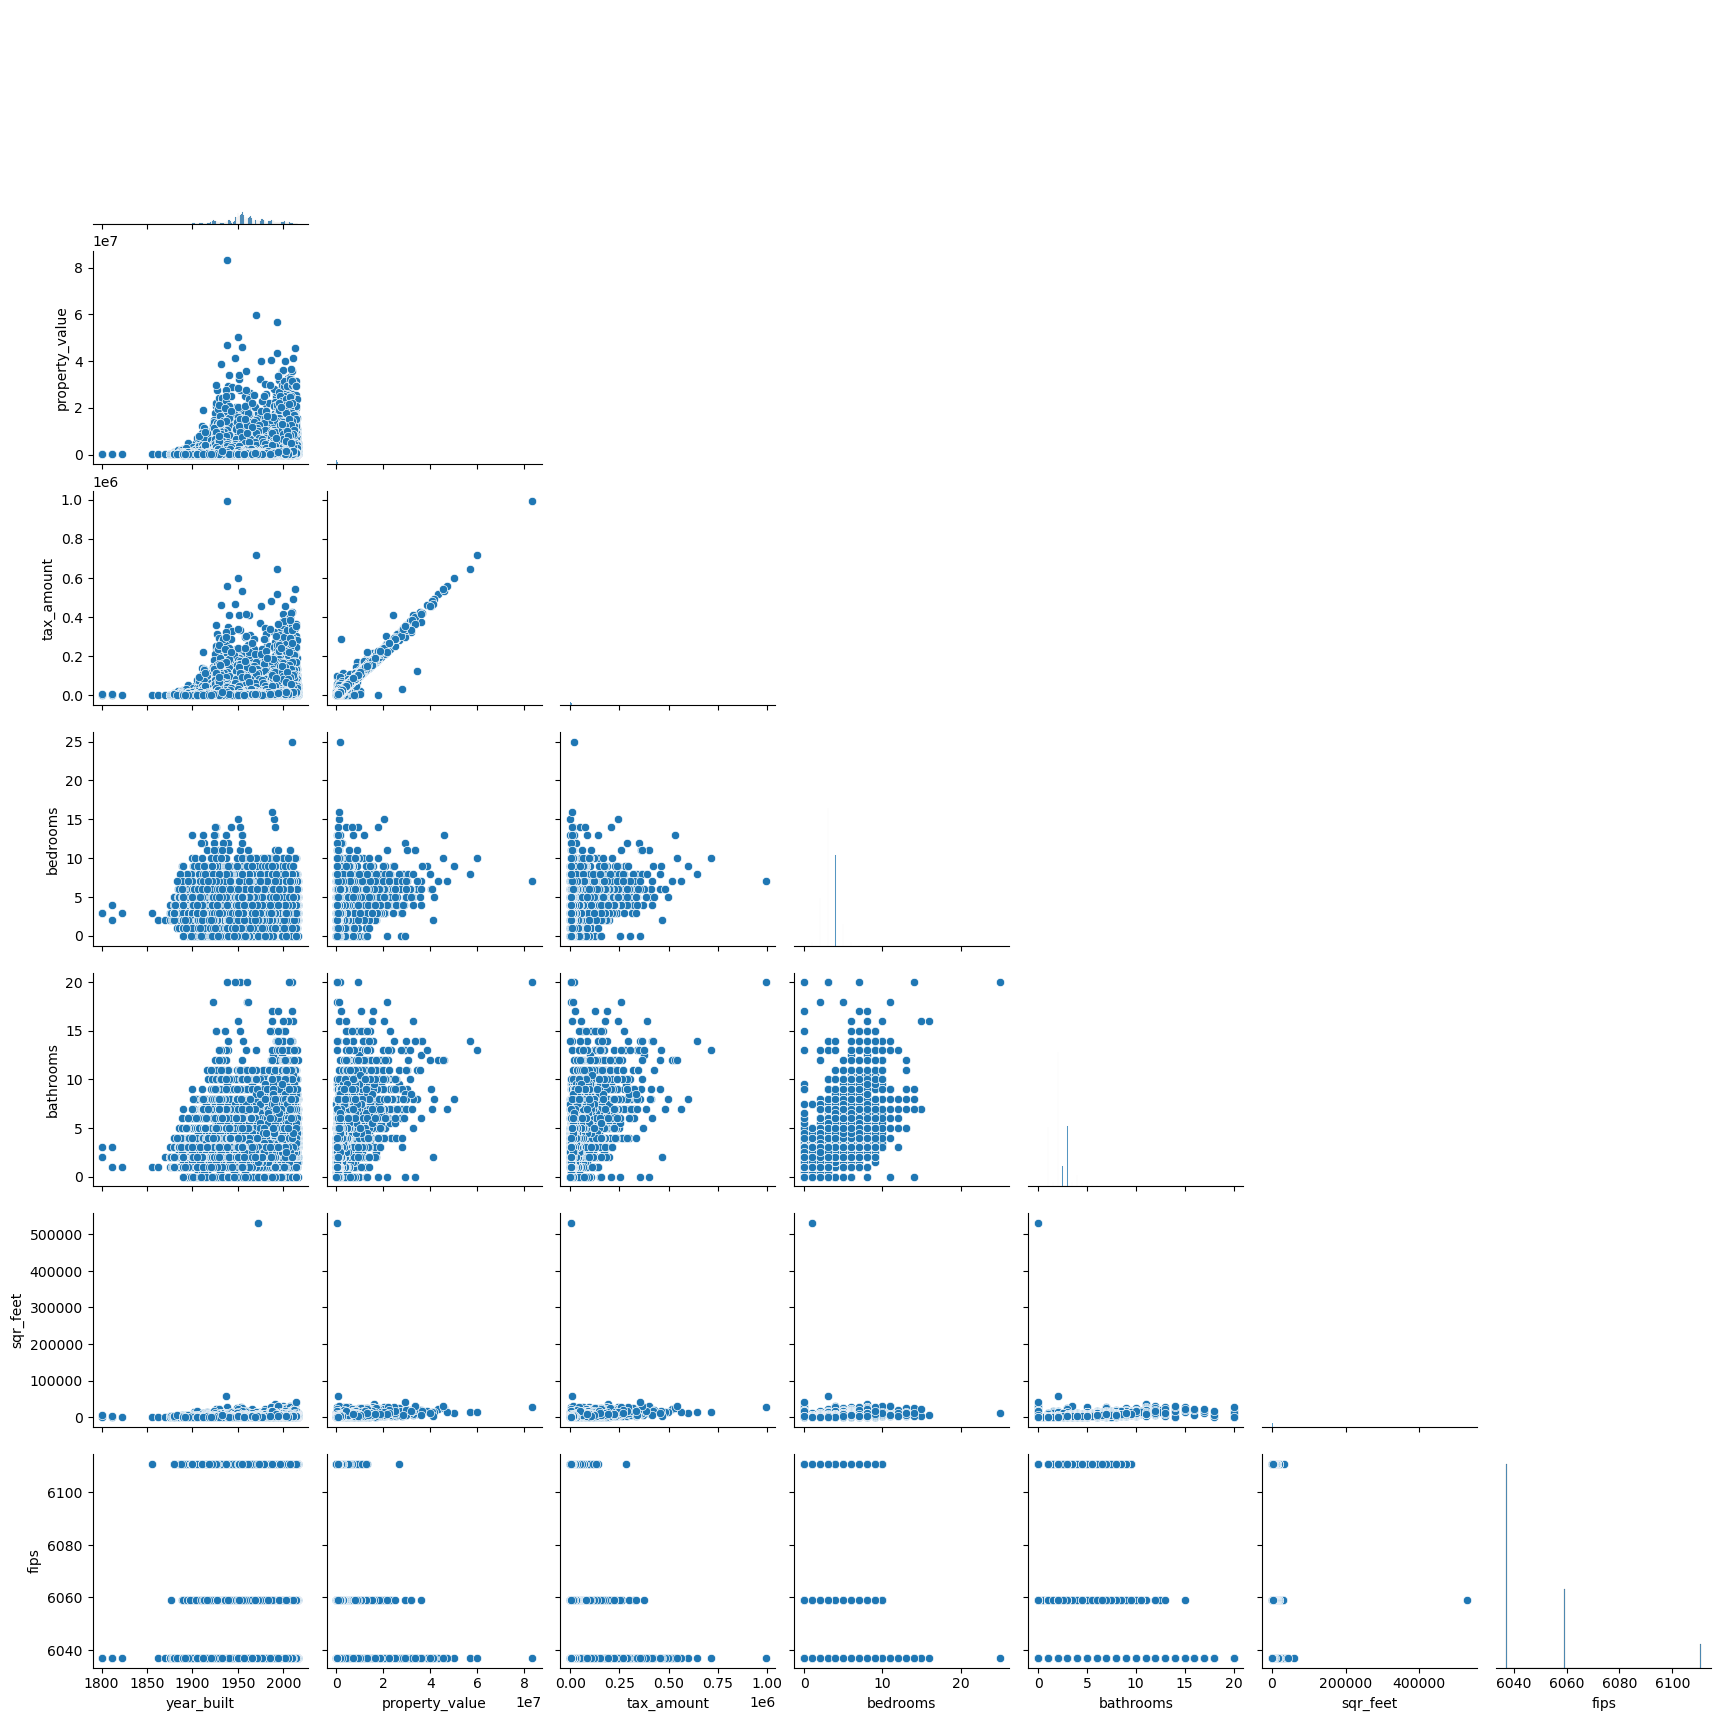

In [29]:
sns.pairplot(train, corner=True)
plt.show()

In [32]:
corr= train.corr()
corr

,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet,fips
year_built,1.000000,0.193014,0.194676,0.377385,0.509533,0.392739,0.300607
property_value,0.193014,1.000000,0.990425,0.259286,0.507247,0.548269,0.018351
tax_amount,0.194676,0.990425,1.000000,0.260512,0.507785,0.546605,-0.005263
bedrooms,0.377385,0.259286,0.260512,1.000000,0.641983,0.539584,0.136412
bathrooms,0.509533,0.507247,0.507785,0.641983,1.000000,0.744199,0.097763
sqr_feet,0.392739,0.548269,0.546605,0.539584,0.744199,1.000000,0.086191
fips,0.300607,0.018351,-0.005263,0.136412,0.097763,0.086191,1.000000


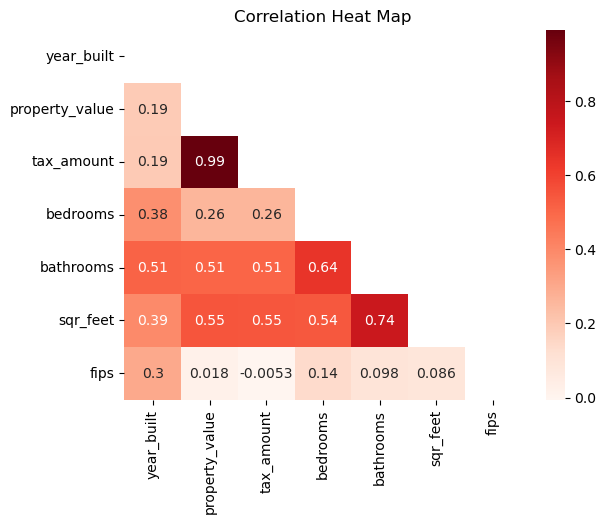

In [57]:
kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Reds', annot=True, mask= mask)
plt.title('Correlation Heat Map')
plt.show()

## Statistical Testing

### $H_{o}$: There is no correlation between the total square feet and property value
<br>
### $H_{a}$: There is a relationship between the total square feet and property value